# Instance Segmentation with Mask R-CNN 

---
## Import Libraries.

In [ ]:
from PIL import Image
import matplotlib.pyplot as plt
import torch
import torchvision.transforms as T
import torchvision
import torch
import numpy as np
import cv2
import random
import time
import os


## Load The Pretrained Model.

## Define The Class Names Given by PyTorch’s Official Docs.

In [ ]:
maskrcnn_model = torchvision.models.detection.maskrcnn_resnet50_fpn(pretrained=True).eval()


COCO_INSTANCE_CATEGORY_NAMES = [
    '__background__', 'person', 'bicycle', 'car', 'motorcycle', 'airplane', 'bus',
    'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'N/A', 'stop sign',
    'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow',
    'elephant', 'bear', 'zebra', 'giraffe', 'N/A', 'backpack', 'umbrella', 'N/A', 'N/A',
    'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball',
    'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket',
    'bottle', 'N/A', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl',
    'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza',
    'donut', 'cake', 'chair', 'couch', 'potted plant', 'bed', 'N/A', 'dining table',
    'N/A', 'N/A', 'toilet', 'N/A', 'tv', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone',
    'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'N/A', 'book',
    'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush'
]

##  Create Some Helper Functions.

In [ ]:

def random_colour_masks(image):
 

    colours = [[0, 255, 0],[0, 0, 255],[255, 0, 0],[0, 255, 255],[255, 255, 0],[255, 0, 255],[80, 70, 180],[250, 80, 190],[245, 145, 50],[70, 150, 250],[50, 190, 190]]
    r = np.zeros_like(image).astype(np.uint8)
    g = np.zeros_like(image).astype(np.uint8)
    b = np.zeros_like(image).astype(np.uint8)
    r[image == 1], g[image == 1], b[image == 1] = colours[random.randrange(0,10)]
    coloured_mask = np.stack([r, g, b], axis=2)
    return coloured_mask


def get_prediction(img_path, threshold):
 

    img = Image.open(img_path)
    transform = T.Compose([T.ToTensor()])
    img = transform(img)
    pred = maskrcnn_model([img])
    pred_score = list(pred[0]['scores'].detach().numpy())
    pred_t = [pred_score.index(x) for x in pred_score if x>threshold][-1]
    masks = (pred[0]['masks']>0.5).squeeze().detach().cpu().numpy()
    pred_class = [COCO_INSTANCE_CATEGORY_NAMES[i] for i in list(pred[0]['labels'].numpy())]
    pred_boxes = [[(i[0], i[1]), (i[2], i[3])] for i in list(pred[0]['boxes'].detach().numpy())]
    masks = masks[:pred_t+1]
    pred_boxes = pred_boxes[:pred_t+1]
    pred_class = pred_class[:pred_t+1]
    return masks, pred_boxes, pred_class    



def instance_segmentation_api(img_path, threshold=0.5, rect_th=3, text_size=3, text_th=3):
  

    masks, boxes, pred_cls = get_prediction(img_path, threshold)
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    boxes = np.asarray(boxes, dtype=int) 
    for i in range(len(masks)):
        rgb_mask = random_colour_masks(masks[i])
        img = cv2.addWeighted(img, 1, rgb_mask, 0.5, 0)
        cv2.rectangle(img, boxes[i][0], boxes[i][1],color=(0, 255, 0), thickness=rect_th)
        cv2.putText(img,pred_cls[i], boxes[i][0], cv2.FONT_HERSHEY_SIMPLEX, text_size, (0,255,0),thickness=text_th)

    plt.figure(figsize=(20,30))
    plt.title("Mask R-CNN")
    plt.imshow(img)
    plt.xticks([])
    plt.yticks([])
    plt.show()


In [ ]:
# We will use the following colors to fill the pixels
colours = [[0, 255, 0],
           [0, 0, 255],
           [255, 0, 0],
           [0, 255, 255],
           [255, 255, 0],
           [255, 0, 255],
           [80, 70, 180],
           [250, 80, 190],
           [245, 145, 50],
           [70, 150, 250],
           [50, 190, 190]]

## Inference

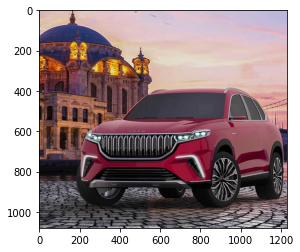

In [ ]:
# Download the image and plotting it
img = Image.open('./electric_car.jpg')
plt.imshow(img)
plt.show()


In [ ]:
# Running inference on the image
transform = T.Compose([T.ToTensor()])
img_tensor = transform(img)
pred = maskrcnn_model([img_tensor])

# Lets look at what the `pred` looks like.
# `pred` is a list of dictionaries, since we had passed a single image, we will get a single-item list
pred[0]

{'boxes': tensor([[5.4706e+02, 2.0877e+01, 5.8429e+02, 3.8064e+01],
         [1.9664e+02, 3.7426e+02, 1.2300e+03, 9.9747e+02],
         [1.8269e+02, 3.6684e+02, 1.2138e+03, 9.9458e+02],
         [4.6194e+02, 1.1842e+00, 4.9688e+02, 1.4328e+01],
         [6.1728e+02, 5.7466e+01, 6.5759e+02, 7.3138e+01],
         [4.7672e+02, 2.8219e+02, 5.0761e+02, 3.1486e+02],
         [6.2291e+02, 6.2421e+01, 6.5749e+02, 7.1064e+01],
         [3.3153e+02, 2.3976e+02, 3.9989e+02, 3.2870e+02],
         [6.1742e+02, 5.7225e+01, 6.5694e+02, 7.3103e+01],
         [5.5158e+02, 2.4223e+01, 6.5862e+02, 7.2271e+01],
         [4.6787e+02, 2.4256e+02, 5.1523e+02, 3.1813e+02],
         [4.0796e+02, 2.7136e+02, 4.7726e+02, 3.3664e+02],
         [5.6095e+02, 2.5625e+01, 5.8408e+02, 3.8814e+01],
         [6.1691e+02, 5.5953e+01, 6.3848e+02, 7.2913e+01],
         [1.1982e+03, 6.0252e+02, 1.2300e+03, 7.9651e+02],
         [4.6384e+02, 1.1578e+00, 4.9599e+02, 1.4962e+01],
         [2.3171e+02, 3.4488e+02, 1.2133e+03, 9

In [ ]:
# We will keep only the pixels with values  greater than 0.5 as 1, and set the rest to 0.
masks = (pred[0]['masks']>0.5).squeeze().detach().cpu().numpy()
masks.shape

(18, 1080, 1230)

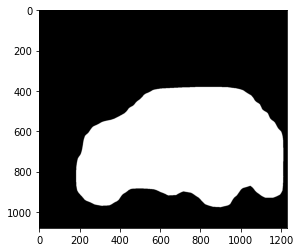

In [ ]:
# Let's plot the mask for the `car` class since the 2th mask belongs to `car`
plt.imshow(masks[2], cmap='gray')
plt.show()

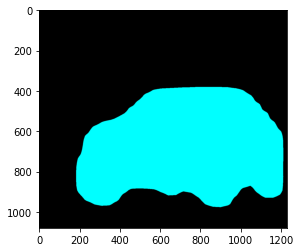

In [ ]:
# Let's color the `car` mask using the `random_colour_masks` function
mask1 = random_colour_masks(masks[2])
plt.imshow(mask1)
plt.show()

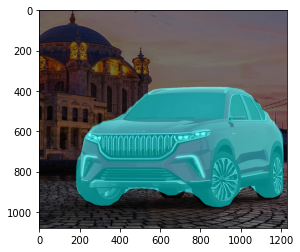

In [ ]:
# Let's blend the original and the masked image and plot it.
blend_img = cv2.addWeighted(np.asarray(img), 0.5, mask1, 0.5, 0)

plt.imshow(blend_img)
plt.show()

--2022-12-02 12:11:56--  https://upload.wikimedia.org/wikipedia/commons/5/5d/401_Gridlock.jpg
Resolving upload.wikimedia.org (upload.wikimedia.org)... 91.198.174.208, 2620:0:862:ed1a::2:b
Connecting to upload.wikimedia.org (upload.wikimedia.org)|91.198.174.208|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 324724 (317K) [image/jpeg]
Saving to: ‘maskrcnn_cars.jpg’

maskrcnn_cars.jpg   100%[===================>] 317.11K  1.27MB/s    in 0.2s    

2022-12-02 12:11:57 (1.27 MB/s) - ‘maskrcnn_cars.jpg’ saved [324724/324724]



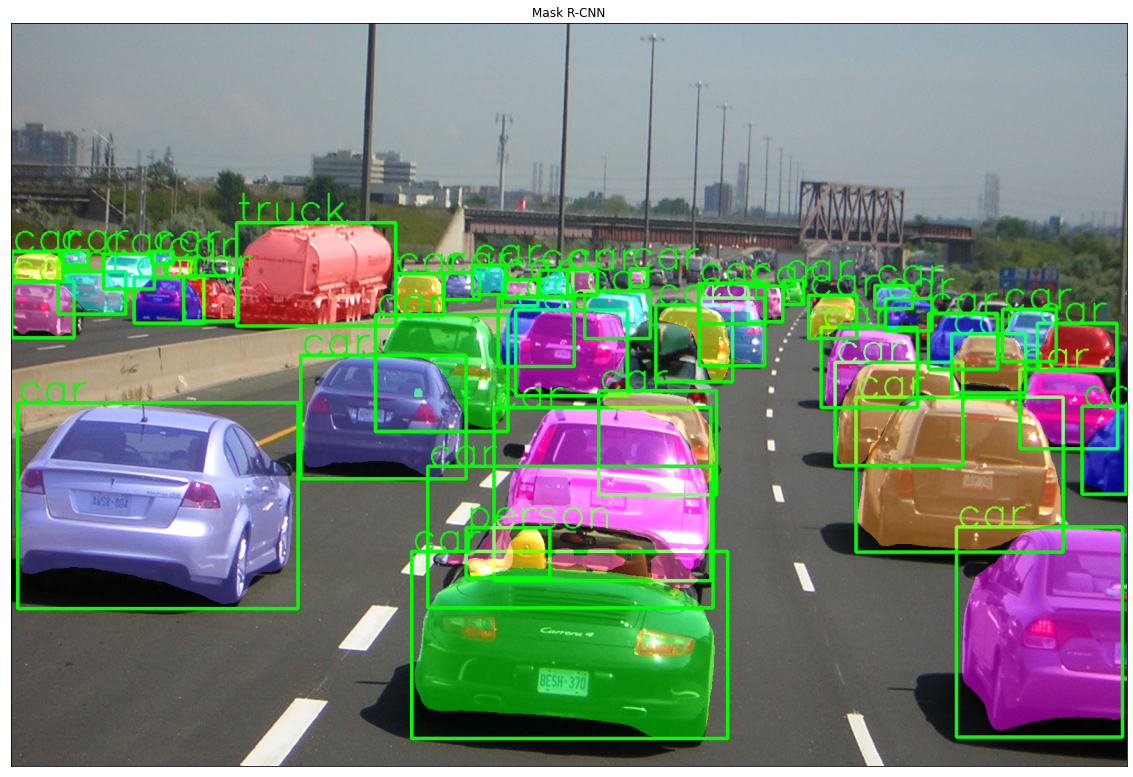

In [ ]:
!wget https://upload.wikimedia.org/wikipedia/commons/5/5d/401_Gridlock.jpg -O maskrcnn_cars.jpg

instance_segmentation_api('./maskrcnn_cars.jpg',  threshold=0.5,  rect_th=3, text_th=2, text_size=2)

--2022-12-02 12:12:36--  https://upload.wikimedia.org/wikipedia/commons/e/ea/WikiGap_2020_in_Yerevan_%281%29.jpg
Resolving upload.wikimedia.org (upload.wikimedia.org)... 91.198.174.208, 2620:0:862:ed1a::2:b
Connecting to upload.wikimedia.org (upload.wikimedia.org)|91.198.174.208|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4385642 (4.2M) [image/jpeg]
Saving to: ‘maskrcnn_people.jpg’

maskrcnn_people.jpg 100%[===================>]   4.18M  --.-KB/s    in 0.1s    

2022-12-02 12:12:36 (27.9 MB/s) - ‘maskrcnn_people.jpg’ saved [4385642/4385642]



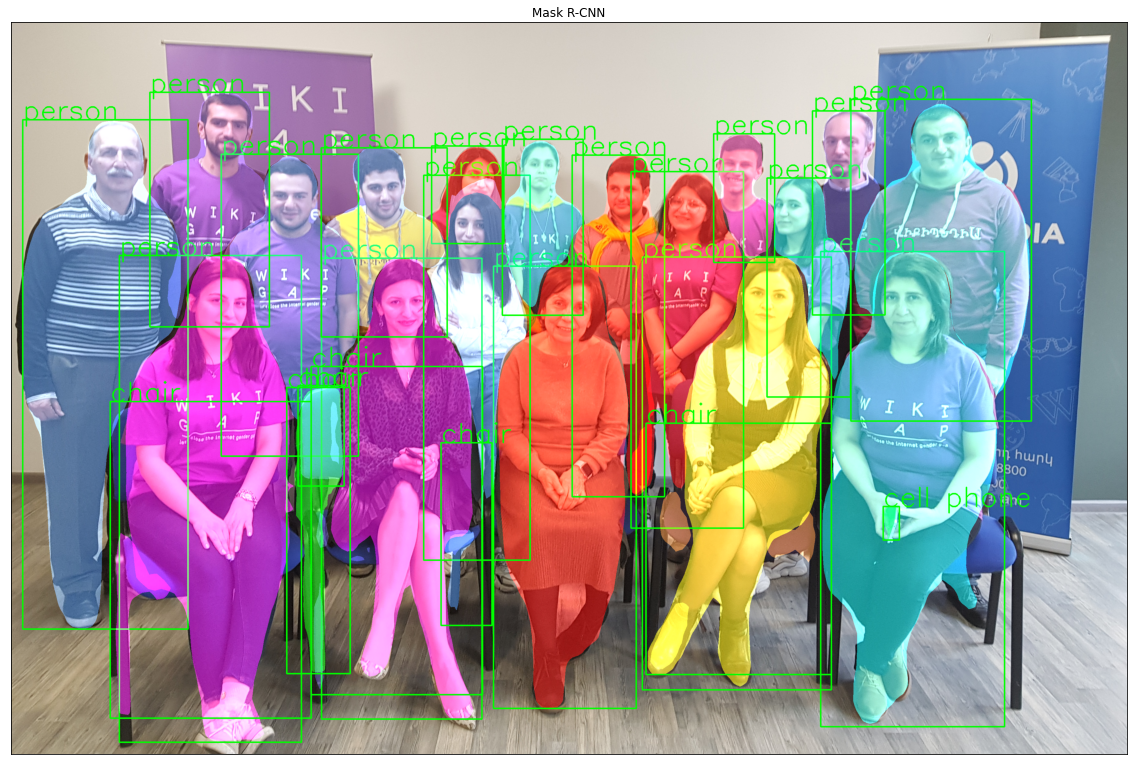

In [ ]:
!wget https://upload.wikimedia.org/wikipedia/commons/e/ea/WikiGap_2020_in_Yerevan_%281%29.jpg -O maskrcnn_people.jpg

instance_segmentation_api('./maskrcnn_people.jpg', threshold=0.7)

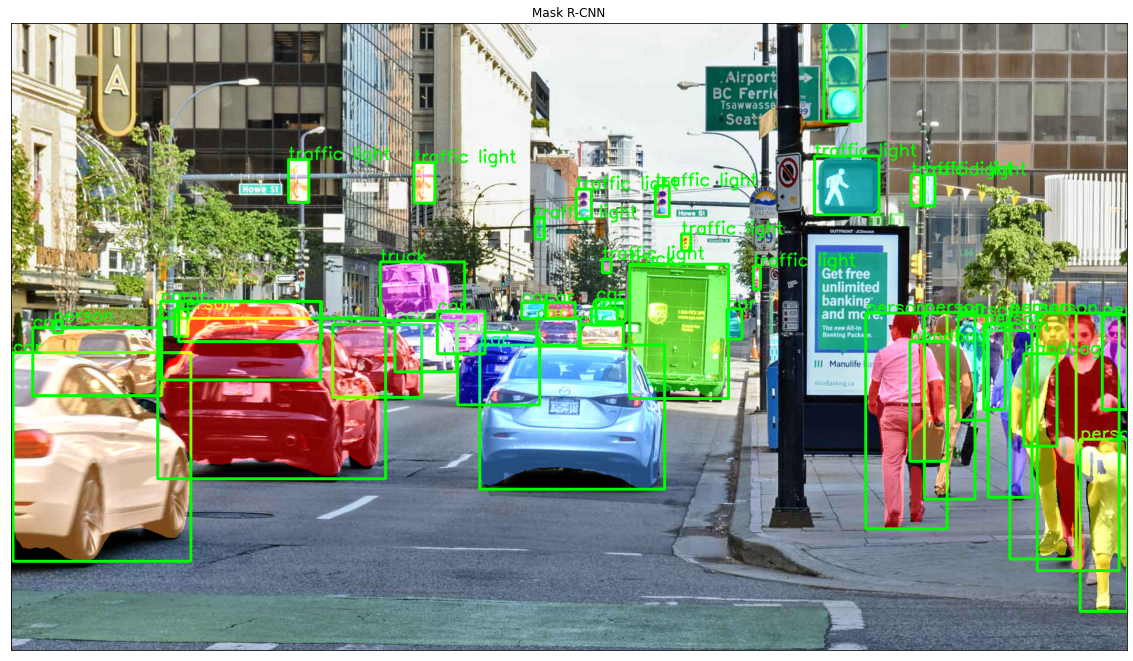

In [ ]:
instance_segmentation_api('./street.jpg', threshold= 0.6,  rect_th=3, text_th=2, text_size=1)

--2022-12-02 12:13:46--  https://upload.wikimedia.org/wikipedia/commons/a/a9/Cats_in_Fushimi_Inari_Shrime_%2811315834234%29.jpg
Resolving upload.wikimedia.org (upload.wikimedia.org)... 91.198.174.208, 2620:0:862:ed1a::2:b
Connecting to upload.wikimedia.org (upload.wikimedia.org)|91.198.174.208|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5572096 (5.3M) [image/jpeg]
Saving to: ‘maskrcnn_cats.jpg’

maskrcnn_cats.jpg   100%[===================>]   5.31M  10.7MB/s    in 0.5s    

2022-12-02 12:13:46 (10.7 MB/s) - ‘maskrcnn_cats.jpg’ saved [5572096/5572096]



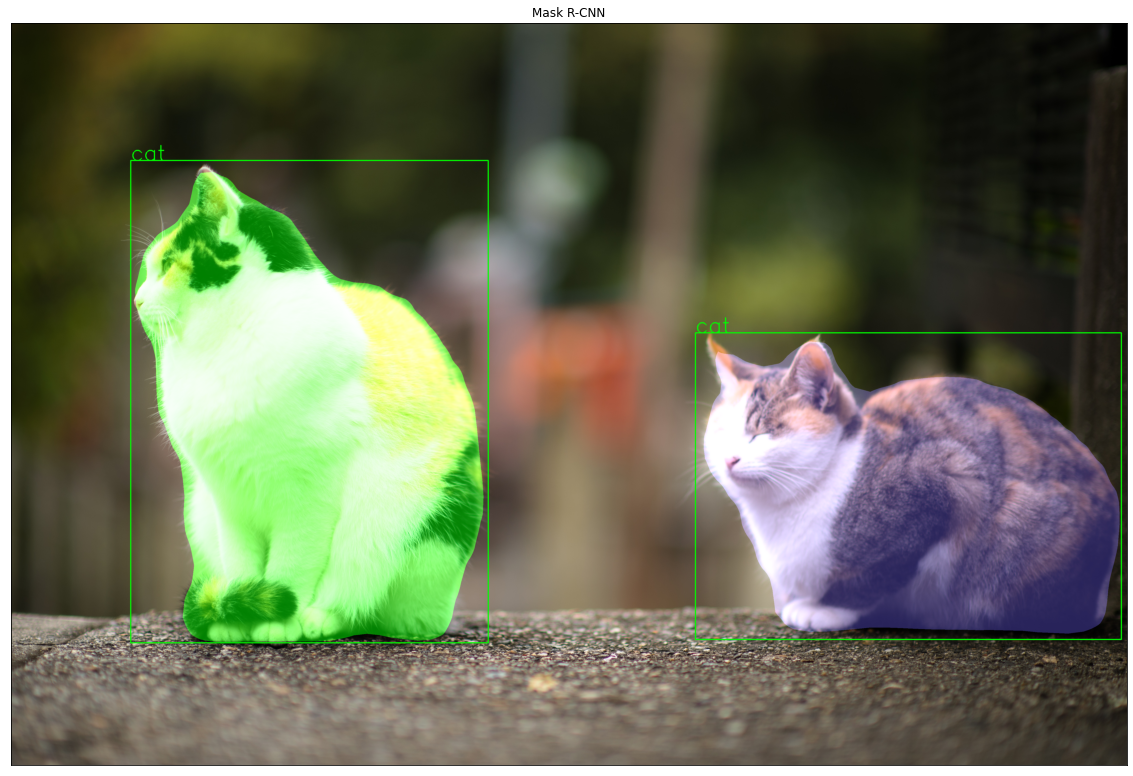

In [ ]:
!wget https://upload.wikimedia.org/wikipedia/commons/a/a9/Cats_in_Fushimi_Inari_Shrime_%2811315834234%29.jpg -O maskrcnn_cats.jpg

instance_segmentation_api('./maskrcnn_cats.jpg', threshold=0.7)

--2022-12-02 12:17:10--  https://upload.wikimedia.org/wikipedia/commons/8/8b/Kangal_puppies.jpg
Resolving upload.wikimedia.org (upload.wikimedia.org)... 91.198.174.208, 2620:0:862:ed1a::2:b
Connecting to upload.wikimedia.org (upload.wikimedia.org)|91.198.174.208|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 507755 (496K) [image/jpeg]
Saving to: ‘maskrcnn_kangalDogs.jpg’

maskrcnn_kangalDogs 100%[===================>] 495.85K  --.-KB/s    in 0.02s   

2022-12-02 12:17:10 (19.5 MB/s) - ‘maskrcnn_kangalDogs.jpg’ saved [507755/507755]



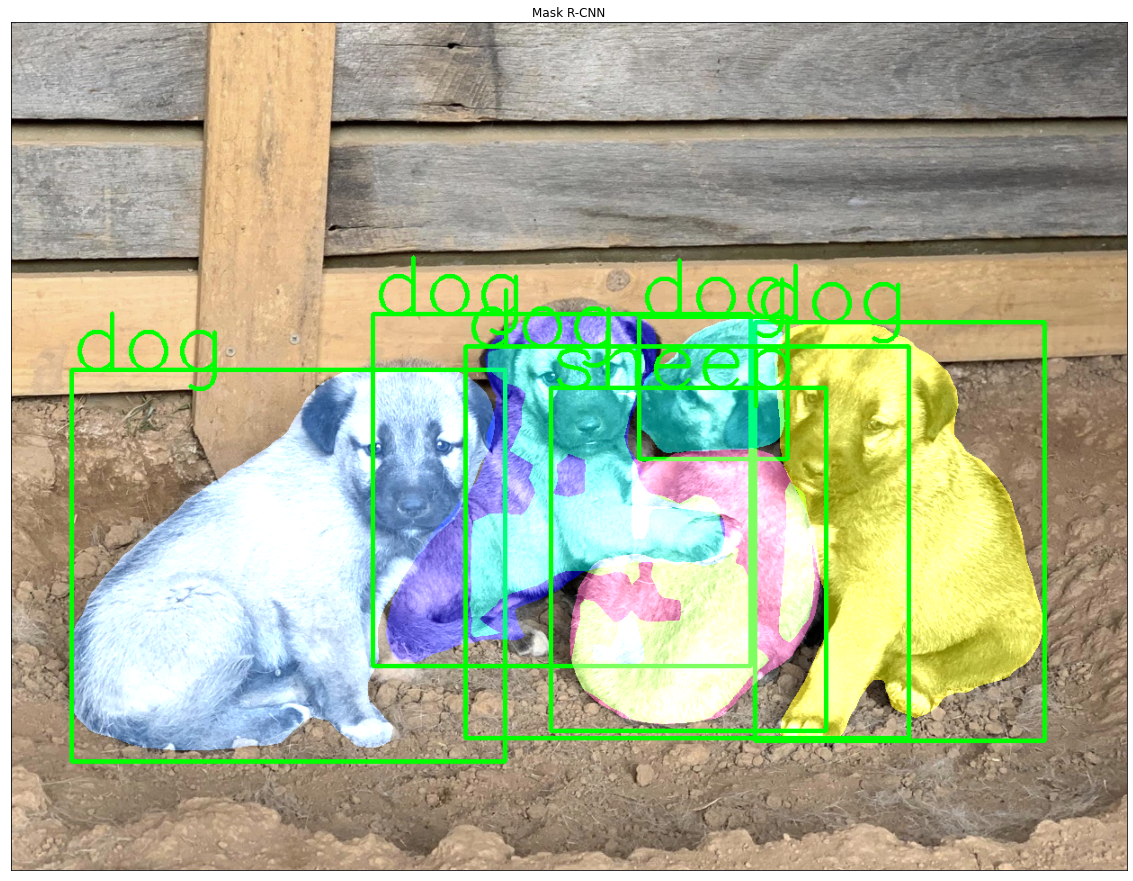

In [ ]:
!wget https://upload.wikimedia.org/wikipedia/commons/8/8b/Kangal_puppies.jpg -O maskrcnn_kangalDogs.jpg

instance_segmentation_api('./maskrcnn_kangalDogs.jpg', threshold=0.6)


--2022-12-02 12:18:23--  https://upload.wikimedia.org/wikipedia/commons/a/a9/Hamburg_Airport_Turkish_Airlines_Boeing_737-8_MAX_TC-LCS_%28DSC06197%29.jpg
Resolving upload.wikimedia.org (upload.wikimedia.org)... 91.198.174.208, 2620:0:862:ed1a::2:b
Connecting to upload.wikimedia.org (upload.wikimedia.org)|91.198.174.208|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1066191 (1.0M) [image/jpeg]
Saving to: ‘maskrcnn_airplane.jpg’

maskrcnn_airplane.j 100%[===================>]   1.02M  2.48MB/s    in 0.4s    

2022-12-02 12:18:24 (2.48 MB/s) - ‘maskrcnn_airplane.jpg’ saved [1066191/1066191]



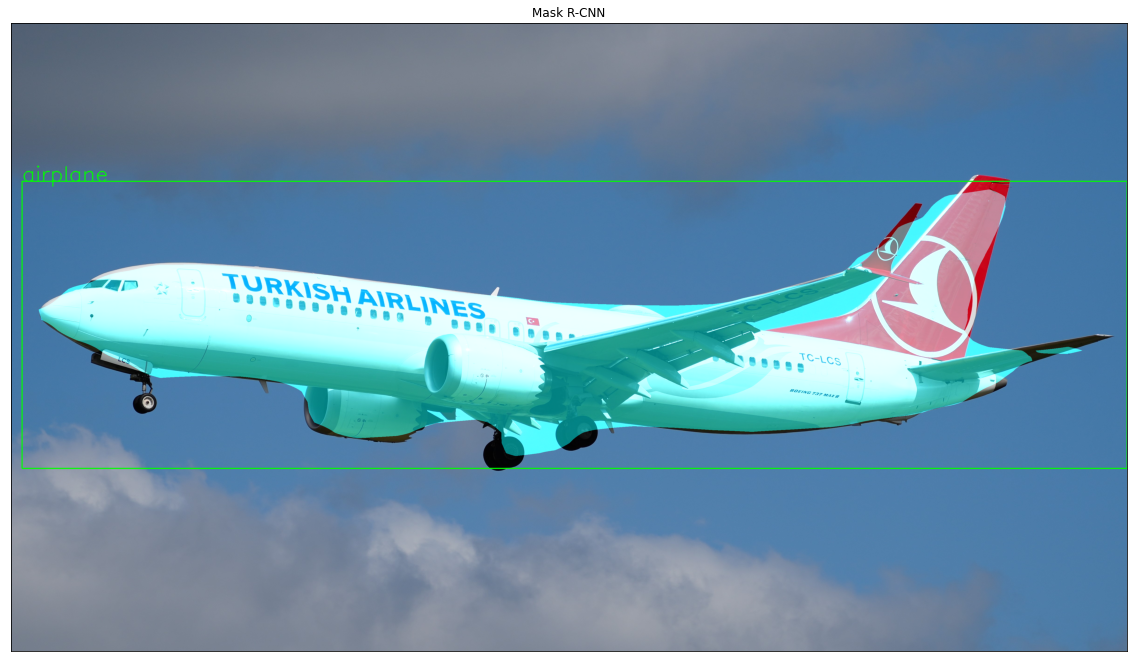

In [ ]:
!wget https://upload.wikimedia.org/wikipedia/commons/a/a9/Hamburg_Airport_Turkish_Airlines_Boeing_737-8_MAX_TC-LCS_%28DSC06197%29.jpg -O maskrcnn_airplane.jpg

instance_segmentation_api('./maskrcnn_airplane.jpg', threshold=0.8)

## ***Conclusion***
- I carried out Mask R-CNN Instance Segmentation with PyTorch using maskrcnn_resnet50_fpn pretrained model.
- We should know the Mask R-CNN is computationally more expensive than Faster R-CNN because Mask R-CNN is based on Faster R-CNN, and it does the extra work needed for generating the mask.

## ***References***
- [Mask R-CNN Models](https://github.com/pytorch/vision/tree/main/torchvision)
- [Auxiliary resource](https://github.com/spmallick)
